# Exercise Sheet 6 Solutions- Parsing

# Learning Objectives

In this lab we are going to:

- How do we represent the structure of sentences using syntax trees?
- Learn how to parse tree using NLTK CFG parser
- Learn how to use NLTK dependency parser
- Difference between constituency parsing and dependency parsing

# Syntactic Trees

The structure of a sentence  can be represented using  syntactic trees. NLTK’s tree module implements the Tree class. A Tree class consists of a node value (typically a string label) and a Python iterable structure containing the node’s children. The iterable can be any Python iterable except for a string, but it is typically a list. The node’s children can be of any type, but they are typically leaf labels (i.e. strings) or Tree objects.


In [ ]:
#setting the stage, as usual with colab ;)
import nltk

In [ ]:
from nltk.tree import *
from nltk.draw import tree

t = Tree('S', [Tree('PRP',['We']), Tree('VBD', ['saw']),
                Tree('NP', [Tree('DT',['the']),Tree('JJ',['yellow']), Tree('NN',['dog'])]) ])

print(t)
# This does not work with Google Colab, but only locally
print(t.draw())

# #prints the label of the root tree
print(t.label())

# #prints the first subtree of the root tree
print (list(i for i in t.subtrees())[1])

(S (PRP We) (VBD saw) (NP (DT the) (JJ yellow) (NN dog)))
None
S
(PRP We)


If you are using Google Colab, you can use [this](http://mshang.ca/syntree/) website to draw the parse tree from `t` here.

### Exercise 1:

Draw the syntactic trees of the two sentences below using NLTK library

1. "The student loved his NLP assignment"

2. "The big yellow book."


In [ ]:
#Sentence 1

from nltk.tree import *
from nltk.draw import tree

t = Tree('S', [Tree('NP', [Tree('DT',['The']),Tree('NN',['student'])]), Tree('VBD',['loved']), 
               Tree('NP', [Tree('DT',['his']),Tree('JJ',['NLP']),Tree('NN',['assignment'])])])

print(t)
# This does not work with Google Colab, but only locally
print(t.draw())

# #prints the label of the root tree
#print(t.label())

# #prints the first subtree of the root tree
#print (list(i for i in t.subtrees())[1])


(S
  (NP (DT The) (NN student))
  (VBD loved)
  (NP (DT his) (JJ NLP) (NN assignment)))
None


In [ ]:
#Sentence 2

from nltk.tree import *
from nltk.draw import tree

t = Tree('NP', [Tree('DT',['the']),Tree('JJ',['big']),Tree('JJ',['yellow']),Tree('NN',['book'])])

print(t)
# This does not work with Google Colab, but only locally
print(t.draw())

(NP (DT the) (JJ big) (JJ yellow) (NN book))
None


# Constituency vs Dependency Parsing

Syntactic parsing is the task of recognizing a sentence and assigning a syntactic
structure to it. A context-free grammar is concerned with how words and sequences of words combine to form constituents. When we provide a syntactic structured modeled on context-free grammar than it is known as constituency parsing. In this we use a set of terminal and non-terminal symbols to represent the constituents of a given sentence as shown in Figure 1. However, constituency parsing could not handle Lexical dependency. This leads to the use of probabilistic context-free grammar (PCGs) and dependency grammar.

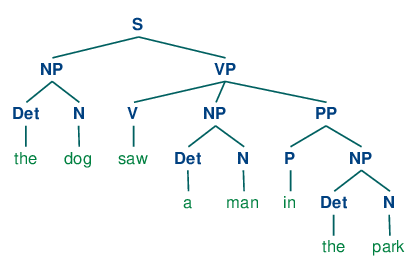

Figure 1: A syntactic tree representation using CFG

Dependency Grammar is described in terms of a set of binary relations that hold between the words in a sentence. It capture the links among the words where each link have a name and form a acyclic structure as shown in Figure 2.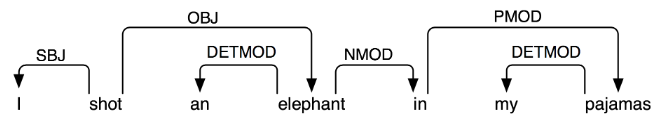

Figure 2: Dependecy tree representation

Available tools:
- <a href="http://nlp.stanford.edu:8080/parser/index.jsp">Stanford Parser</a> <br>
- <a href="http://www.cs.cmu.edu/~ark/TweetNLP/">CMU Twitter Parser</a> 

## Consituency Parsing or CFG parsing (Phrase Structure Rules)

In this example, let us consider a sentence and parse it using CFG rules. In order to do that we will use recursive descent parser from NLTK. 

In [ ]:
import nltk
from nltk.tree import *
from nltk.draw import tree
# Based on CFG grammar rules to detect linguistic phrases
# Example rule for NP: optional determiner (Det) followed by a noun (N) then followed by Optional prepositional phrase

def CFG_parse(sentence):
#grammar with only one rule
  grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP 
  V -> "saw" 
  NP -> N | Det N | 
  Det -> "a" 
  N -> "dog" | "Mary"
  """)
  rd_parser = nltk.RecursiveDescentParser(grammar1)
  sent = sentence.split() # create a chunk parser using this grammar
  for tree in rd_parser.parse(sent):
    print (tree)
    return tree
   
     


cp = CFG_parse('Mary saw a dog') # already tokenised sentences
print(cp.draw())

(S (NP (N Mary)) (VP (V saw) (NP (Det a) (N dog))))
None


### Exercise 2:
Write a **CFG_parse(sentence)** function to parse the sentence "He hit the man with a hat". You may modify the CFG_parse function above.



In [ ]:
import nltk
from nltk.tree import *
from nltk.draw import tree

def CFG_parse(sentence):
#grammar with only one rule
  grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  NP -> Pro | Det N | Det N PP
  PP -> P NP
  V -> "hit"
  Det -> "a" | "the"
  N -> "man" | "hat"
  Pro -> "He"
  P -> "with"
  """)
  rd_parser = nltk.RecursiveDescentParser(grammar1)
  sent = sentence.split() # create a chunk parser using this grammar
  for tree in rd_parser.parse(sent):
    print (tree)
    return tree
   
     


cp = CFG_parse('He hit the man with a hat') # already tokenised sentences
print(cp.draw())



(S
  (NP (Pro He))
  (VP
    (V hit)
    (NP (Det the) (N man) (PP (P with) (NP (Det a) (N hat))))))
None


## Dependency Parsing

In [ ]:
import nltk
from nltk.tree import *
from nltk.draw import tree
# Based on dependency grammar rules to detect linguistic phrases

def dependency_parse(sentence):
    groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
    'shot' -> 'I' | 'elephant' | 'in'
    'elephant' -> 'an' | 'in'
    'in' -> 'pajamas'
    'pajamas' -> 'my'
    """)
    dp_parser = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
    sent = sentence.split() 
    trees = dp_parser.parse(sent)
    for tree in trees:
        print (tree)
        return tree
     


dp = dependency_parse('I shot an elephant in my pajamas')
#print(dp)
print(dp.draw())

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an (in (pajamas my))))
None


### Exercise 3:
Write a **dependency_parse(sentence)** function to parse the sentence "He hit the man with a hat". You may modify the dependency_parse function above.

In [ ]:
#your code goes here
import nltk
from nltk.tree import *
from nltk.draw import tree

def dependency_parse(sentence):
    groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
    'hit' -> 'He' | 'man' | 'with'
    'man' -> 'the' | 'with'
    'with' -> 'hat'
    'hat' -> 'a'
    """)
    dp_parser = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
    sent = sentence.split() # create a chunk parser using this grammar
    trees = dp_parser.parse(sent)
    for tree in trees:
        print (tree)
        print(tree.draw())
        #return tree
     


dp = dependency_parse('He hit the man with a hat')
#print(dp)
#print(dp.draw())

(hit He (man the (with (hat a))))
None
(hit He (man the) (with (hat a)))
None


## Computing Probabilities

Using the given value

S → NP VP 1.0

NP →  D N (PP) 0.4

NP →  D N 0.2

NP →  N 0.6

PP → P NP 1.0

VP → V NP 0.7

VP → V NP (PP) 0.3

P → with 1.0

V → saw 1.0

N → Astronomers 0.1

N → star 0.18

N → telescope 0.1

D → the 0.04




### Exercise 4:  (pen and paper exercise)

Calculate PCFG for the give sentence "Astronomers saw the star with the telescope". Provide least two parse trees for the sentence and show which one has the highest probability.

### Rules for tree 1:

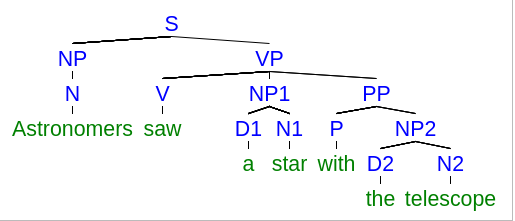


SP → NP VP

NP → N

NP → D N

VP → V NP PP

PP → P NP

Probability count

SP → NP VP           1.0  

NP → N               0.6

NP1 → D1 N1          0.2

NP2 → D2 N2          0.2

VP → V NP1 PP        0.3

PP → P NP2           1.0

P → with             1.0

V → saw              1.0

N → Astronomers      0.1

N1 → star            0.18

N2 → telescope       0.1

D1 → the             0.04

D2 → the             0.04

Probability =      **2.0736e-8**

### Rules for tree 2:

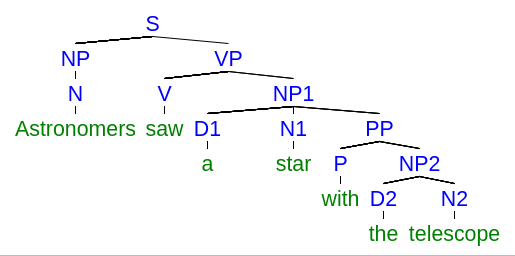

SP → NP VP

NP → N

NP → D N

NP → D N PP

VP → V NP

PP → P NP

Probability count

SP → NP VP            1.0  

NP → N                0.6

NP1 → D1 N1 PP        0.4

NP2 → D2 N2           0.2

VP → V NP1            0.7

PP → P NP2            1.0

P → with              1.0

V → saw               1.0

N → Astronomers       0.1

N1 → star             0.18

N2 → telescope        0.1

D1 → the              0.04

D2 → the              0.04

Probability =      **9.6768e-8**

### Exercise 5: (pen and paper exercise)

 Draw  CYK algorithm chart for the given sentence "Astronomers saw the star with the telescope".

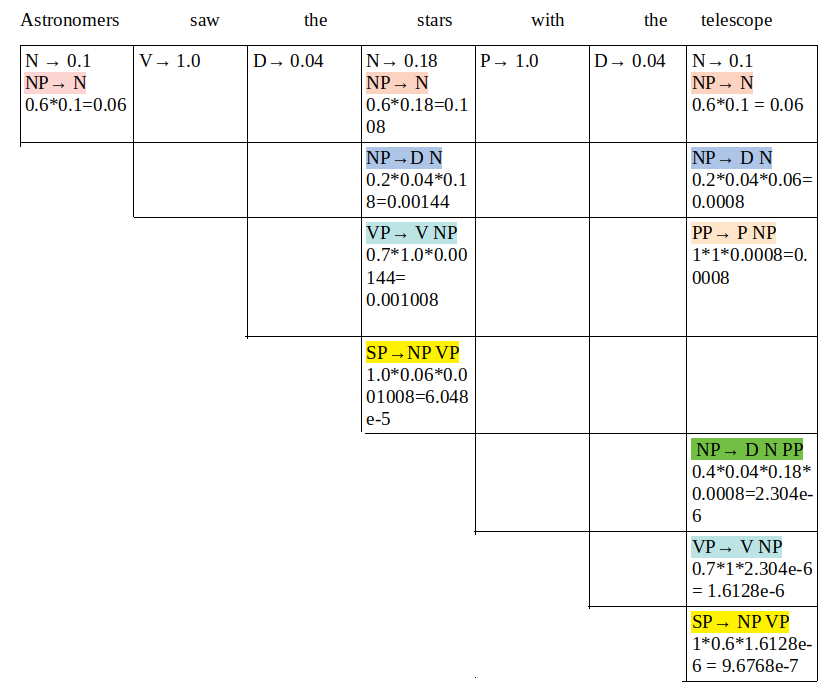